<a href="https://colab.research.google.com/github/Hariharang-git/Harihara/blob/master/Recomentation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving within5rawData.csv to within5rawData.csv


{'within5rawData.csv': b'userId,quizId,markEarned\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d1e2871a18236706cdf90e8),2.5\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d24955b57225e5857cffeeb),5.0\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5c679cd12a5b6412f09f8547),1.25\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5b5ec492ed9ec42d26ab0ffd),2.0\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d2488a657225e5857cffe98),2.8947368421052633\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5e10b89ba0cf2b770dce46b3),2.5\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d11e9617a7ba17f93b2b7a5),4.0\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5de63547a81f162466864a71),2.5\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d8dff1576bbe506ca1ad604),1.6666666666666663\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5b5ec456ed9ec42d26ab0ffc),1.0\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d35657240fd3267caa010b2),2.0\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5c7cc58d6362320c971428a7),5.0\nObjectId(5b3a129d9

In [0]:
import pandas as pd
from fastai.collab import *

In [0]:
df2 = pd.read_csv("/content/within5rawData.csv")
print(df2)

                                   userId  ... markEarned
0      ObjectId(5b3a129d924ff91a6e8bd3ef)  ...   2.500000
1      ObjectId(5b3a129d924ff91a6e8bd3ef)  ...   5.000000
2      ObjectId(5b3a129d924ff91a6e8bd3ef)  ...   1.250000
3      ObjectId(5b3a129d924ff91a6e8bd3ef)  ...   2.000000
4      ObjectId(5b3a129d924ff91a6e8bd3ef)  ...   2.894737
...                                   ...  ...        ...
39090  ObjectId(5e38faf3230e404ec62fe17d)  ...   1.785714
39091  ObjectId(5e38fccb230e404ec62fe275)  ...   4.642857
39092  ObjectId(5e390245230e404ec62fe3aa)  ...   4.642857
39093  ObjectId(5e3902a7230e404ec62fe3af)  ...   5.000000
39094  ObjectId(5e3912865aa2805819be0ba2)  ...   1.666667

[39095 rows x 3 columns]


In [0]:
data = CollabDataBunch.from_df(df2)
print(data.show_batch())
min = df2.markEarned.min()
max = df2.markEarned.max()
print("Min: ",min)
print("max: ",max)

userId,quizId,target
ObjectId(5dc13f098cc88c3540056293),ObjectId(5d496c1d736eec5215b8b1b5),1.7241379
ObjectId(5b851d7d8933201e87164be7),ObjectId(5beb8dedc3dc640cb74776eb),2.375
ObjectId(5de0b13e4701ef7e0782a062),ObjectId(5d89afab10a1d3071b5adf85),1.9178082
ObjectId(5c46afb06553b03d47ec1327),ObjectId(5ca45a8de1644675ba0ea84c),1.5
ObjectId(5ca59c58e1644675ba0ea868),ObjectId(5c6e41d96362320c9713b799),2.25


None
Min:  0.08333333333333334
max:  5.0


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-07
Min loss divided by 10: 6.31E-08
2.51188643150958e-07


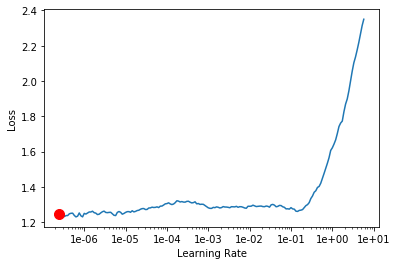

In [0]:
learn = collab_learner(data, n_factors=50, y_range=(min,max))
learn.lr_find(stop_div=False, num_it=200)
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr
print(min_grad_lr)

In [0]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)
learn.save("/content/models/pretained")

epoch,train_loss,valid_loss,time
0,0.183075,1.008597,00:06
1,0.293691,1.031263,00:06
2,0.291729,1.002990,00:07
3,0.180709,1.007101,00:07
4,0.095920,1.008358,00:06


In [0]:
learn_nn = collab_learner(data, use_nn=True, layers=[256, 128], y_range=(min, max))

In [0]:
learn_nn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,1.064705,1.077638,00:35
1,0.916363,1.050472,00:31
2,0.720764,1.006781,00:35
3,0.570894,1.016121,00:32
4,0.422467,1.044536,00:29


In [0]:
learn_nn.save("pretained_nn")

In [0]:
files.upload()

Saving test.csv to test.csv


{'test.csv': b'userId,quizId\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d1e2871a18236706cdf90e8)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d24955b57225e5857cffeeb)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5c679cd12a5b6412f09f8547)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5b5ec492ed9ec42d26ab0ffd)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d2488a657225e5857cffe98)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5e10b89ba0cf2b770dce46b3)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d11e9617a7ba17f93b2b7a5)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5de63547a81f162466864a71)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d8dff1576bbe506ca1ad604)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5b5ec456ed9ec42d26ab0ffc)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5d35657240fd3267caa010b2)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5c7cc58d6362320c971428a7)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5b7e43d92614560c0d1b80de)\nObjectId(5b3a129d924ff91a6e8bd3ef),ObjectId(5be

In [0]:
df3 = pd.read_csv("test.csv")
test_learn = CollabDataBunch.from_df(df2, test = df3,seed = 42, user_name='userId', item_name = 'quizId', no_check = True)
learn = collab_learner(test_learn, n_factors=50, y_range = (min,max), wd = 0.1)

In [0]:
learn_load = learn.load('/content/models/pretained')

In [0]:
preds, y = learn_load.get_preds(DatasetType.Test)

In [0]:
for idx, (score, name) in enumerate(sorted(zip(preds,df3.quizId),reverse=True)):
  if idx >= 40:
    break
  print("Score: ", round(float(score),2),'\t',"for Quiz: ", name)

Score:  4.51 	 for Quiz:  ObjectId(5d8f7cb176bbe506ca1af036)
Score:  4.48 	 for Quiz:  ObjectId(5c7cc58d6362320c971428a7)
Score:  4.42 	 for Quiz:  ObjectId(5bc082177b5a7a51bd68faf5)
Score:  4.19 	 for Quiz:  ObjectId(5c552b3b6553b03d47ec1b07)
Score:  4.19 	 for Quiz:  ObjectId(5df4b9d1a6573d0c197e8a4d)
Score:  4.11 	 for Quiz:  ObjectId(5d90435376bbe506ca1af1f1)
Score:  4.06 	 for Quiz:  ObjectId(5bb74ae794beb51f72c5776d)
Score:  4.04 	 for Quiz:  ObjectId(5c6e571b6362320c9713b9d2)
Score:  3.99 	 for Quiz:  ObjectId(5e27fa3158192e1402e22130)
Score:  3.91 	 for Quiz:  ObjectId(5b7e6d0b2614560c0d1b8139)
Score:  3.77 	 for Quiz:  ObjectId(5c52dc9a6553b03d47ec1a80)
Score:  3.77 	 for Quiz:  ObjectId(5d24955b57225e5857cffeeb)
Score:  3.74 	 for Quiz:  ObjectId(5d2ffefffd9f4702c2455266)
Score:  3.68 	 for Quiz:  ObjectId(5ddd211f2d7dbf234ffc049a)
Score:  3.66 	 for Quiz:  ObjectId(5bdc23509a0d255d48c768b4)
Score:  3.66 	 for Quiz:  ObjectId(5d273d0cfd9f4702c244bb8b)
Score:  3.65 	 for Quiz:

In [0]:
learn_load_nn = learn_nn.load('/content/models/pretained_nn')

In [0]:
preds_nn, y_nn = learn_load_nn.get_preds()
print(y_nn)

tensor([1.6667, 2.5000, 3.7500,  ..., 3.0769, 0.7895, 2.5000])


In [0]:
for idx, (score, name) in enumerate(sorted(zip(preds_nn,df3.quizId),reverse=True)):
  if idx >= 40:
    break
  print("Score: ", round(float(score),2),'\t',"for Quiz: ", name)

Score:  4.86 	 for Quiz:  ObjectId(5cadc71f0351f5297b182106)
Score:  4.86 	 for Quiz:  ObjectId(5d010a567ef007761ab55242)
Score:  4.72 	 for Quiz:  ObjectId(5b7ea1d92614560c0d1b816e)
Score:  4.7 	 for Quiz:  ObjectId(5d2348c9456ef23fcbedbb2c)
Score:  4.69 	 for Quiz:  ObjectId(5e2bc88258192e1402e24a85)
Score:  4.67 	 for Quiz:  ObjectId(5def45d29ed6154227517615)
Score:  4.66 	 for Quiz:  ObjectId(5c7b878c6362320c97141e19)
Score:  4.58 	 for Quiz:  ObjectId(5df3a89e7058d3673694da65)
Score:  4.54 	 for Quiz:  ObjectId(5bdc23509a0d255d48c768b4)
Score:  4.43 	 for Quiz:  ObjectId(5dd04ac36642da4b43c948b7)
Score:  4.37 	 for Quiz:  ObjectId(5e10b89ba0cf2b770dce46b3)
Score:  4.35 	 for Quiz:  ObjectId(5d35657240fd3267caa010b2)
Score:  4.3 	 for Quiz:  ObjectId(5e09c2e6cd036341e6164964)
Score:  4.24 	 for Quiz:  ObjectId(5bda87999a0d255d48c757f1)
Score:  4.23 	 for Quiz:  ObjectId(5e171db43e392b290450980a)
Score:  4.19 	 for Quiz:  ObjectId(5d43f1823687b156d2fda1ff)
Score:  4.17 	 for Quiz:  

In [0]:
print(learn.summary())

EmbeddingNN
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [343]                4,998,539  True      
______________________________________________________________________
Embedding            [46]                 18,584     True      
______________________________________________________________________
Dropout              [389]                0          False     
______________________________________________________________________
Linear               [256]                99,840     True      
______________________________________________________________________
ReLU                 [256]                0          False     
______________________________________________________________________
BatchNorm1d          [256]                512        True      
______________________________________________________________________
Linear               [128]                32,896     True      
__________________________________________________